<a href="https://colab.research.google.com/github/ayusjayaswal/imageman/blob/main/stable_diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
%pip install --quiet --upgrade diffusers transformers accelerate invisible_watermark mediapy omegaconf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 97.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 72.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 82.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 73.6 MB/s eta 0:00:00


In [6]:
use_refiner = False

In [7]:
import mediapy as media
import random
import sys
import torch

from diffusers import DiffusionPipeline

model = "stabilityai/stable-diffusion-xl-base-1.0" # @param ["digiplay/Realisian_v5", "stabilityai/stable-diffusion-xl-base-1.0", "hakurei/waifu-diffusion", "Linaqruf/anything-v3.0"]

pipe = DiffusionPipeline.from_pretrained(
    model,
    torch_dtype=torch.float16,
    safety_checker=None,
    requires_safety_checker=False
)

pipe = pipe.to("cuda")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/10.3G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

Keyword arguments {'safety_checker': None, 'requires_safety_checker': False} are not expected by StableDiffusionXLPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Prompt:	emacs chad running his emacs on a linux computer 
Seed:	4329492846


""

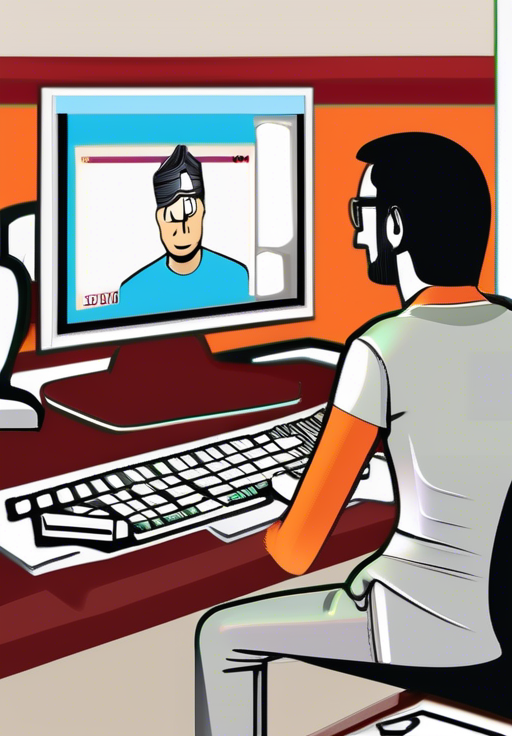

In [9]:
import os
prompt = "emacs chad running his emacs on a linux computer " #@param {type:"string"}
seed = 4329492846 # @param {type:"slider", min:0, max:9000000000, step:1}

negative_prompt = "bad-picture-chill-75v, ng_deepnegative_v1_75t, badhandv4, (worst quality:2), (low quality:2), (normal quality:2), (lowres:2), (bad anatomy:2), (bad hands:2), (watermark:2), (mole:1.5), (freckles:1.5)" #@param {type:"string"}

width = 512  #@param {type:"slider", min:8, max:2048, step:8}
height = 736  #@param {type:"slider", min:8, max:2048, step:8}

# Mengambil nilai dari widget param
width = int(width)
height = int(height)
images = pipe(
    prompt=prompt,
    width=width,
    height=height,
    negative_prompt=negative_prompt,
    output_type="latent" if use_refiner else "pil",
    generator=torch.Generator().manual_seed(seed)
).images


if use_refiner:
  images = refiner(
      prompt = prompt,
      negative_prompt = negative_prompt,
      image = images,
      ).images

print(f"Prompt:\t{prompt}\nSeed:\t{seed}")

# Nama file yang akan digunakan
base_filename = "output.jpg"
new_filename = base_filename

# Cek apakah file dengan nama yang sama sudah ada
if os.path.exists(base_filename):
    # Jika sudah ada, tambahkan angka di belakangnya
    index = 1
    while True:
        new_filename = f"output_{index}.jpg"
        if not os.path.exists(new_filename):
            break
        index += 1

# Simpan gambar dengan nama yang telah ditentukan
images[0].save(new_filename)

# Menampilkan gambar
media.show_images(images)
